In [1]:
from pandas import DataFrame, read_csv, Series
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from bigml.api import BigML
api = BigML(project="project/5d94a42042129f2b0500005c")

# Récupération du trainfull modifié (avec features modifiées) + randomization des données

In [2]:
df = read_csv('fulltrain_mod.csv').sample(frac=1, replace=True, random_state=1)
df.head()

,Unnamed: 0,Unnamed: 0.1,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MonthlyIncome_sansna,Sum,IncomePerPerson
128037,128037,128038,0,0.204151,53,0,0.436564,4271.0,7,0,1,1,0.0,4271.0,1,4271.000000
5192,5192,5193,0,0.441020,51,1,0.512074,6666.0,16,0,2,0,2.0,6666.0,1,2222.000000
50057,50057,50058,0,0.000000,42,0,0.347464,9600.0,8,0,2,0,2.0,9600.0,0,3200.000000
109259,109259,109260,0,0.196150,40,0,0.312737,5000.0,10,0,1,0,2.0,5000.0,0,1666.666667
73349,73349,73350,0,0.144183,56,0,2362.000000,NaN,5,0,1,0,1.0,0.0,0,NaN


# Création du validation set (derniers 20% du trainfull)

In [22]:
df[-int(len(df)*20/100):].to_csv("191103 learning-curves_val.csv")

# Création du train (premiers 80% du trainfull)

In [23]:
df_train = df[:-int(len(df)*20/100)]

# Création de train set de différentes tailles pour tracer la learning curve

In [24]:
df_train[:int(len(df_train)*10/100)].to_csv("191103 learning-curves_train10.csv")
df_train[:int(len(df_train)*20/100)].to_csv("191103 learning-curves_train20.csv")
df_train[:int(len(df_train)*40/100)].to_csv("191103 learning-curves_train40.csv")
df_train[:int(len(df_train)*80/100)].to_csv("191103 learning-curves_train80.csv")
df_train.to_csv("191103 learning-curves_train.csv")

# Importation des sets

In [27]:
val_source = api.create_source('191103 learning-curves_val.csv', {"name": "191103 learning-curves_val", "source_parser": {"missing_tokens": ["NULL"]}})
train_source = api.create_source('191103 learning-curves_train.csv', {"name": "191103 learning-curves_train", "source_parser": {"missing_tokens": ["NULL"]}})
train10_source = api.create_source('191103 learning-curves_train10.csv', {"name": "191103 learning-curves_train10", "source_parser": {"missing_tokens": ["NULL"]}})
train20_source = api.create_source('191103 learning-curves_train20.csv', {"name": "191103 learning-curves_train20", "source_parser": {"missing_tokens": ["NULL"]}})
train40_source = api.create_source('191103 learning-curves_train40.csv', {"name": "191103 learning-curves_train40", "source_parser": {"missing_tokens": ["NULL"]}})
train80_source = api.create_source('191103 learning-curves_train80.csv', {"name": "191103 learning-curves_train80", "source_parser": {"missing_tokens": ["NULL"]}})

# Création des datasets

In [29]:
val_dataset = api.create_dataset(val_source, {"name": "191103 learning-curves_val"})
train_dataset = api.create_dataset(train_source, {"name": "191103 learning-curves_train"})
api.ok(val_dataset)
api.ok(train_dataset)
train10_dataset = api.create_dataset(train10_source, {"name": "191103 learning-curves_train10"})
train20_dataset = api.create_dataset(train20_source, {"name": "191103 learning-curves_train20"})
api.ok(train10_dataset)
api.ok(train20_dataset)
train40_dataset = api.create_dataset(train40_source, {"name": "191103 learning-curves_train40"})
train80_dataset = api.create_dataset(train80_source, {"name": "191103 learning-curves_train80"})
api.ok(train40_dataset)
api.ok(train80_dataset);

True

# Création des modèles pour les différentes tailles de train

In [30]:
model = api.create_ensemble(train_dataset, {"objective_field": "SeriousDlqin2yrs"})
model10 = api.create_ensemble(train10_dataset, {"objective_field": "SeriousDlqin2yrs"})
api.ok(model)
api.ok(model10)
model20 = api.create_ensemble(train20_dataset, {"objective_field": "SeriousDlqin2yrs"})
model40 = api.create_ensemble(train40_dataset, {"objective_field": "SeriousDlqin2yrs"})
api.ok(model20)
api.ok(model40)
model80 = api.create_ensemble(train80_dataset, {"objective_field": "SeriousDlqin2yrs"})
api.ok(model80)

model = api.get_ensemble(model)
model10 = api.get_ensemble(model10)
api.ok(model)
api.ok(model10)
model20 = api.get_ensemble(model20)
model40 = api.get_ensemble(model40)
api.ok(model20)
api.ok(model40)
model80 = api.get_ensemble(model80)

# Evaluation des modèles

In [2]:
evaluation = api.create_evaluation(model, val_dataset, {"name": "191103 learning-curves_train"})
evaluation10 = api.create_evaluation(model10, val_dataset, {"name": "191103 learning-curves_train10"})
api.ok(evaluation)
api.ok(evaluation10)
evaluation20 = api.create_evaluation(model20, val_dataset, {"name": "191103 learning-curves_train20"})
evaluation40 = api.create_evaluation(model40, val_dataset, {"name": "191103 learning-curves_train40"})
api.ok(evaluation20)
api.ok(evaluation40)
evaluation80 = api.create_evaluation(model80, val_dataset, {"name": "191103 learning-curves_train80"})
api.ok(evaluation80);

NameError: name 'model' is not defined

In [5]:
model = api.get_ensemble("ensemble/5dbf113c5299631c8200fd7a")
model10 = api.get_ensemble("ensemble/5dbf113d7811dd0554001030")
model20 = api.get_ensemble("ensemble/5dbf11635299631c8200fd7d")
model40 = api.get_ensemble("ensemble/5dbf11647811dd7f2d00f3e2")
model80 = api.get_ensemble("ensemble/5dbf11777811dd7f2d00f3e5")

# Récupération des valeurs d'auc (performance), et tracé de la learning curve de validation

In [12]:
auc = evaluation['object']['result']['model']['per_class_statistics'][1]['area_under_roc_curve']
auc10 = evaluation10['object']['result']['model']['per_class_statistics'][1]['area_under_roc_curve']
auc20 = evaluation20['object']['result']['model']['per_class_statistics'][1]['area_under_roc_curve']
auc40 = evaluation40['object']['result']['model']['per_class_statistics'][1]['area_under_roc_curve']
auc80 = evaluation80['object']['result']['model']['per_class_statistics'][1]['area_under_roc_curve']

In [7]:
evaluation = api.get_evaluation("evaluation/5dbf11c6e476847468010728")
evaluation10 = api.get_evaluation("evaluation/5dbf11c8e47684746801072b")
evaluation20 = api.get_evaluation("evaluation/5dbf11dae47684746801072e")
evaluation40 = api.get_evaluation("evaluation/5dbf11db5299631c8200fd80")
evaluation80 = api.get_evaluation("evaluation/5dbf11ec7811dd7f2d00f3e8")

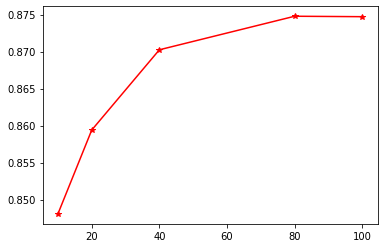

In [19]:
plt.plot([10, 20, 40, 80, 100], [auc10, auc20, auc40, auc80, auc], 'r*-');

# Récupération des datasets de train

In [16]:
train_dataset = api.get_dataset("dataset/5dbf10205299631c8200fd68")
train10_dataset = api.get_dataset("dataset/5dbf10657811dd7f2d00f3cd")
train20_dataset = api.get_dataset("dataset/5dbf10735299631c8200fd6e")
train40_dataset = api.get_dataset("dataset/5dbf10b57811dd7f2d00f3d6")
train80_dataset = api.get_dataset("dataset/5dbf10ce7811dd7f2d00f3d9")

# Création des modèles évalué sur le train (pour la training curve)

In [18]:
evaluationtrain = api.create_evaluation(model, train_dataset, {"name": "191103 learning-curves_traintrain"})
evaluationtrain10 = api.create_evaluation(model10, train10_dataset, {"name": "191103 learning-curves_traintrain10"})
api.ok(evaluationtrain)
api.ok(evaluationtrain10)
evaluationtrain20 = api.create_evaluation(model20, train20_dataset, {"name": "191103 learning-curves_traintrain20"})
evaluationtrain40 = api.create_evaluation(model40, train40_dataset, {"name": "191103 learning-curves_traintrain40"})
api.ok(evaluationtrain20)
api.ok(evaluationtrain40)
evaluationtrain80 = api.create_evaluation(model80, train80_dataset, {"name": "191103 learning-curves_traintrain80"})
api.ok(evaluationtrain80);

# Récupération des valeurs d'auc et tracé de la training curve

In [20]:
auctrain = evaluationtrain['object']['result']['model']['per_class_statistics'][1]['area_under_roc_curve']
auctrain10 = evaluationtrain10['object']['result']['model']['per_class_statistics'][1]['area_under_roc_curve']
auctrain20 = evaluationtrain20['object']['result']['model']['per_class_statistics'][1]['area_under_roc_curve']
auctrain40 = evaluationtrain40['object']['result']['model']['per_class_statistics'][1]['area_under_roc_curve']
auctrain80 = evaluationtrain80['object']['result']['model']['per_class_statistics'][1]['area_under_roc_curve']

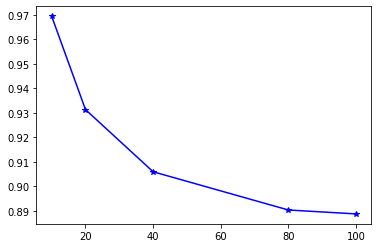

In [21]:
plt.plot([10, 20, 40, 80, 100], [auctrain10, auctrain20, auctrain40, auctrain80, auctrain], 'b*-');

# Représentation graphique

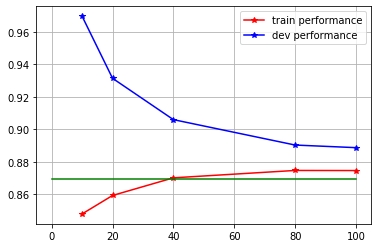

In [29]:
plt.plot([10, 20, 40, 80, 100], [auc10, auc20, auc40, auc80, auc], 'r*-', label='train performance');
plt.plot([10, 20, 40, 80, 100], [auctrain10, auctrain20, auctrain40, auctrain80, auctrain], 'b*-', label='dev performance')
plt.plot([0, 100], [0.86955, 0.86955], 'g-')
plt.legend();plt.grid();